In [1]:
import numpy
from scipy import linalg

from matplotlib import pyplot
%matplotlib inline

In [2]:
# parameters
L = 1.0  # length of the rod
nx = 21  # number of points on the rod
dx = L / (nx - 1)  # grid spacing
x = numpy.linspace(0.0, L, num=nx)  # grid points

alpha = 1.22e-3  # thermal diffusivity of the rod

# set the initial temperature distribution.
T0 = numpy.zeros(nx)
T0[0] = 100.0

In [25]:
def solve_1d(T0, nt, dt, dx, alpha, cI, cE, bc):
    T = T0.copy()
    N = len(T0) - 2
    A, b_bc = lhs_operator(N, dt, dx, alpha, cI, bc)
    
    for n in range(nt):
        b = rhs_operator(T, dt, dx, alpha, cE)
        T[1:-1] = linalg.solve(A, b - b_bc)
        
        # Neumann BCs
        update_boundaries(T, dx, bc)
    
    return T

In [19]:
def lhs_operator(N, dt, dx, alpha, cI, bc):
    I = numpy.identity(N)
    L, b_bc = laplacian_1d(N, dx, bc)
    A = I / dt - cI * alpha * L
    return A, b_bc

In [5]:
bc_left = {'type':'Dirichlet', 'value':100.0}
bc_right = {'type':'Neumann', 'value':0.0}
bc = {'left':bc_left, 'right':bc_right}

In [34]:
def laplacian_1d(N, dx, bc):
    D = numpy.diag(-2.0 / dx ** 2 * numpy.ones(N))
    L = numpy.diag(1.0 * dx ** 2 * numpy.ones(N - 1), k=-1)
    U = numpy.diag(1.0 / dx ** 2 * numpy.ones(N - 1), k=+1)
    A = D + U + L
    
    b_bc = numpy.zeros(N)
    
    # left boundary
    if bc['left']['type'] == 'Dirichlet':
        b_bc[0] = bc['left']['value'] / dx ** 2
    elif bc['left']['type'] == 'Neumann':
        A[0, 0] = -1.0 / dx ** 2
        b_bc[0] = bc['left']['value'] / dx
        
    # right boundary
    if bc['right']['type'] == 'Dirichlet':
        b_bc[-1] = bc['right']['value'] / dx ** 2
    elif bc['right']['type'] == 'Neumann':
        A[-1, -1] = -1.0 / dx ** 2
        b_bc[-1] = bc['right']['value'] / dx
    return A, b_bc

In [30]:
def rhs_operator(T, dt, dx, alpha, cE):
    b = T[1:-1] / dt + cE * alpha * (T[:-2] - 2 * T[1:-1] + T[2:]) / dx ** 2
    return b

In [8]:
def update_boundaries(T, dx, bc):
    T[0] = get_boundary_value(T[1], dx, bc['left'])
    T[1] = get_boundary_value(T[-2], dx, bc['right'])
    
    return

In [9]:
def get_boundary_value(T_neighbor, dx, bc):
    
    if bc['type'] == 'Dirichlet':
        return bc['value']
    elif bc['type'] == 'Neumann':
        return T_neighbor + bc['value'] * dx
    else:
        raise ValueError('Only Dirichlet and Neumann conditions are supported')

    return

In [39]:
sigma = 0.5
dt = sigma * dx ** 2 / alpha
nt = 10

T = solve_1d(T0, nt, dt, dx, alpha, 0.5, 0.5, bc)

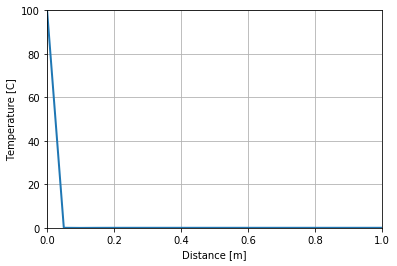

In [38]:
pyplot.figure(figsize=(6.0, 4.0))
pyplot.xlabel('Distance [m]')
pyplot.ylabel('Temperature [C]')
pyplot.grid()
pyplot.plot(x, T, color='C0', linestyle='-', linewidth=2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 100.0);